### Electric Vehicle Market Segmentation

In [1]:
# the data source
# https://cleanmobilityshift.com/ev-dashboard/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
EV_india_data= pd.read_csv('EV-Dashboard-Data.csv')
# the datset shows the sales of different types of vehicles in India across different states from 2014 to 2024

In [4]:
EV_india_data.head(15)

,Year,Month_name,Day,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
0,2022,feb,1,2/1/2022,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,0,15,...,0,0,1,0,0,0,0,0,0,16
1,2022,feb,1,2/1/2022,Andaman & Nicobar Island,MAXI CAB,Others,Others,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2022,feb,1,2/1/2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0,0,...,0,0,326,0,0,0,0,0,0,326
3,2022,feb,1,2/1/2022,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0,0,...,0,0,61,0,0,0,0,0,0,61
4,2022,feb,1,2/1/2022,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,0,0,...,0,0,1,0,0,0,0,0,0,1
5,2022,feb,1,2/1/2022,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,0,13,...,0,0,98,0,0,0,0,0,0,111
6,2022,feb,1,2/1/2022,Andaman & Nicobar Island,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,0,0,...,0,0,1,0,0,0,0,0,0,1
7,2022,feb,1,2/1/2022,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0,5,...,0,0,0,0,0,0,0,0,0,5
8,2022,feb,1,2/1/2022,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0,6,...,0,0,11,0,0,0,0,0,0,17
9,2022,nov,1,11/1/2022,Andaman & Nicobar Island,BUS,Bus,Bus,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
for col in EV_india_data.columns:
    print(col)

Year
Month_name
Day
Date
State
Vehicle Class
Vehicle Category
Vehicle Type
CNG ONLY
DIESEL
DIESEL/HYBRID
DI-METHYL ETHER
DUAL DIESEL/BIO CNG
DUAL DIESEL/CNG
DUAL DIESEL/LNG
ELECTRIC(BOV)
ETHANOL
FUEL CELL HYDROGEN
LNG
LPG ONLY
METHANOL
NOT APPLICABLE
PETROL
PETROL/CNG
PETROL/ETHANOL
PETROL/HYBRID
PETROL/LPG
PETROL/METHANOL
SOLAR
Total


In [6]:
# DATA CLEANING
# Since we need only electric vehicle data we can remove the petrol and diesel columns as well as the day column as we have a seperate 
# column for date
EV_india_data = EV_india_data[['Year', 'Month_name','Date','State','Vehicle Class','Vehicle Category','Vehicle Type','ELECTRIC(BOV)','Total']]

In [7]:
EV_india_data

,Year,Month_name,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,ELECTRIC(BOV),Total
0,2022,feb,2/1/2022,Andaman & Nicobar Island,GOODS CARRIER,Others,Others,0,16
1,2022,feb,2/1/2022,Andaman & Nicobar Island,MAXI CAB,Others,Others,0,1
2,2022,feb,2/1/2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,0,326
3,2022,feb,2/1/2022,Andaman & Nicobar Island,MOPED,2-Wheelers,2W_Personal,0,61
4,2022,feb,2/1/2022,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,0,1
...,...,...,...,...,...,...,...,...,...
96840,2024,jan,1/1/2024,Karnataka,TRACTOR (COMMERCIAL),Others,Others,0,290
96841,2024,jan,1/1/2024,Karnataka,TRAILER (AGRICULTURAL),Others,Others,0,1041
96842,2024,jan,1/1/2024,Karnataka,TRAILER (COMMERCIAL),Others,Others,0,71
96843,2024,jan,1/1/2024,Karnataka,VEHICLE FITTED WITH GENERATOR,Others,Others,0,3


In [8]:
# we can now remove those rows where the sale of electric vehicle sale was zero for better results in analysis.
EV_india_data = EV_india_data[EV_india_data['ELECTRIC(BOV)'] != 0]

In [9]:
EV_india_data

,Year,Month_name,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,ELECTRIC(BOV),Total
12,2022,nov,11/1/2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,386
15,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1,156
16,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5,15
96,2015,sep,9/1/2015,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,42636
122,2015,aug,8/1/2015,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,52242
...,...,...,...,...,...,...,...,...,...
96830,2024,jan,1/1/2024,Karnataka,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,40,158
96831,2024,jan,1/1/2024,Karnataka,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,147,319
96837,2024,jan,1/1/2024,Karnataka,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,259,907
96838,2024,jan,1/1/2024,Karnataka,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,292,4917


In [10]:
# for better results and clear visualisations we can analyse the data from 2020 to 2024 
EV_india_data = EV_india_data[EV_india_data['Year'] != 2014]
EV_india_data = EV_india_data[EV_india_data['Year'] != 2015]
EV_india_data = EV_india_data[EV_india_data['Year'] != 2016]
EV_india_data = EV_india_data[EV_india_data['Year'] != 2017]
EV_india_data = EV_india_data[EV_india_data['Year'] != 2018]
EV_india_data = EV_india_data[EV_india_data['Year'] != 2019]

In [11]:
EV_india_data

,Year,Month_name,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,ELECTRIC(BOV),Total
12,2022,nov,11/1/2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,386
15,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1,156
16,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5,15
274,2022,dec,12/1/2022,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,3,8
276,2022,dec,12/1/2022,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,10,15
...,...,...,...,...,...,...,...,...,...
96830,2024,jan,1/1/2024,Karnataka,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,40,158
96831,2024,jan,1/1/2024,Karnataka,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,147,319
96837,2024,jan,1/1/2024,Karnataka,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,259,907
96838,2024,jan,1/1/2024,Karnataka,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,292,4917


In [12]:
EV_india_data = EV_india_data.reset_index()

In [13]:
EV_india_data

,index,Year,Month_name,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,ELECTRIC(BOV),Total
0,12,2022,nov,11/1/2022,Andaman & Nicobar Island,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,386
1,15,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1,156
2,16,2022,nov,11/1/2022,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5,15
3,274,2022,dec,12/1/2022,Andaman & Nicobar Island,MOTOR CAB,4-Wheelers,4W_Shared,3,8
4,276,2022,dec,12/1/2022,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,10,15
...,...,...,...,...,...,...,...,...,...,...
8879,96830,2024,jan,1/1/2024,Karnataka,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,40,158
8880,96831,2024,jan,1/1/2024,Karnataka,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,147,319
8881,96837,2024,jan,1/1/2024,Karnataka,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,259,907
8882,96838,2024,jan,1/1/2024,Karnataka,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,292,4917


In [14]:
EV_india_data=EV_india_data.drop(columns=['index'])

In [15]:
EV_india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8884 entries, 0 to 8883
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              8884 non-null   int64 
 1   Month_name        8884 non-null   object
 2   Date              8884 non-null   object
 3   State             8884 non-null   object
 4   Vehicle Class     8884 non-null   object
 5   Vehicle Category  8884 non-null   object
 6   Vehicle Type      8884 non-null   object
 7   ELECTRIC(BOV)     8884 non-null   int64 
 8   Total             8884 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 624.8+ KB


In [16]:
EV_india_data.isnull().sum()

Year                0
Month_name          0
Date                0
State               0
Vehicle Class       0
Vehicle Category    0
Vehicle Type        0
ELECTRIC(BOV)       0
Total               0
dtype: int64

In [17]:
EV_india_data.duplicated().sum()

0

In [18]:
# we can see that there are no null values in any columns
# there are no duplicate values in the rows

In [19]:
EV_india_data.describe()

,Year,ELECTRIC(BOV),Total
count,8884.000000,8884.000000,8884.000000
mean,2021.846240,354.487393,8711.131247
std,1.117239,1350.962189,24721.607658
min,2020.000000,1.000000,1.000000
25%,2021.000000,4.000000,79.000000
50%,2022.000000,24.000000,592.500000
75%,2023.000000,140.000000,4022.000000
max,2024.000000,20584.000000,378779.000000


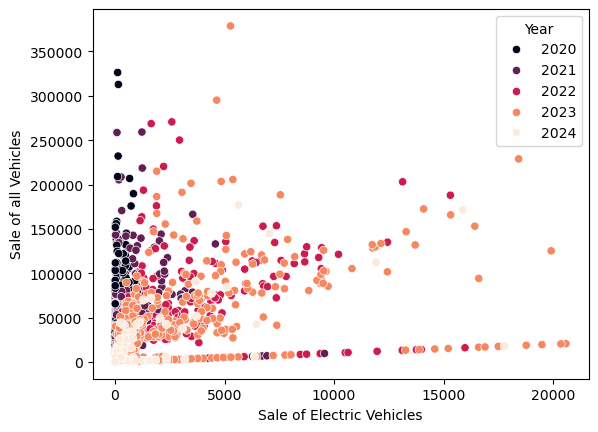

In [20]:
sns.scatterplot(data=EV_india_data,x='ELECTRIC(BOV)',y='Total',hue='Year',palette='rocket')
plt.xlabel('Sale of Electric Vehicles')
plt.ylabel('Sale of all Vehicles')
plt.show()

Text(0.5, 1.0, 'India’s Electric Vehicle Market')

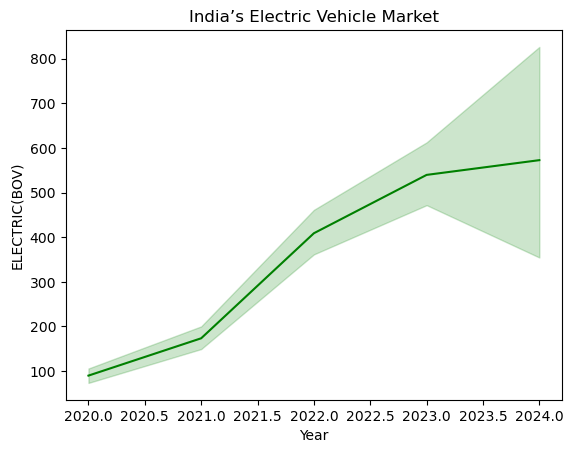

In [21]:
sns.lineplot(data=EV_india_data,x='Year',y='ELECTRIC(BOV)',color='green')
plt.title('India’s Electric Vehicle Market')

<Axes: xlabel='Year', ylabel='ELECTRIC(BOV)'>

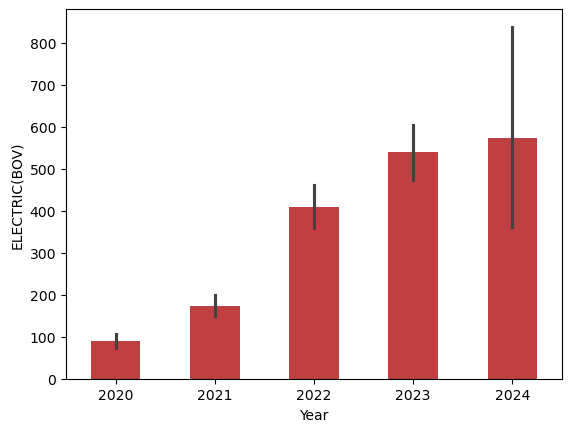

In [22]:
sns.barplot(data=EV_india_data,x='Year',y='ELECTRIC(BOV)',color='red',saturation=0.5,width=0.5)

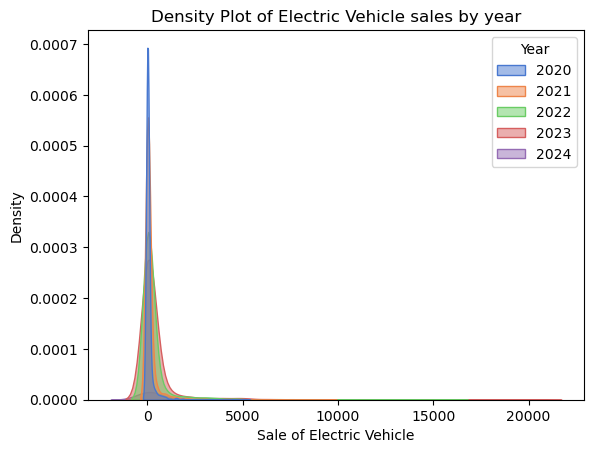

In [23]:
sns.kdeplot(data=EV_india_data,x='ELECTRIC(BOV)',hue='Year',fill=True,alpha=0.5,linewidth=1,palette='muted')
plt.title("Density Plot of Electric Vehicle sales by year")
plt.xlabel("Sale of Electric Vehicle")
plt.ylabel("Density")
plt.show()

In [24]:
# We can see the trend from the above line graph and bar graph , the sales of electric vehicle has increased from 2020 to 2024

In [25]:
# Now lets find the total number of sales each year
Sales= EV_india_data.groupby(["Year"])['ELECTRIC(BOV)'].sum()

In [26]:
Sales

Year
2020     124684
2021     331498
2022    1024723
2023    1525179
2024     143182
Name: ELECTRIC(BOV), dtype: int64

In [27]:
## we can see that the highest sales was in the year 2023 and the total sales is increasing

In [28]:
EV_2024 = EV_india_data[EV_india_data['Year'] == 2024]
EV_2023 = EV_india_data[EV_india_data['Year'] == 2023]
EV_2022 = EV_india_data[EV_india_data['Year'] == 2022]
EV_2021 = EV_india_data[EV_india_data['Year'] == 2021]
EV_2020 = EV_india_data[EV_india_data['Year'] == 2020]

In [29]:
# Now lets plot the montlhy sales for each Year

<Axes: xlabel='Year', ylabel='ELECTRIC(BOV)'>

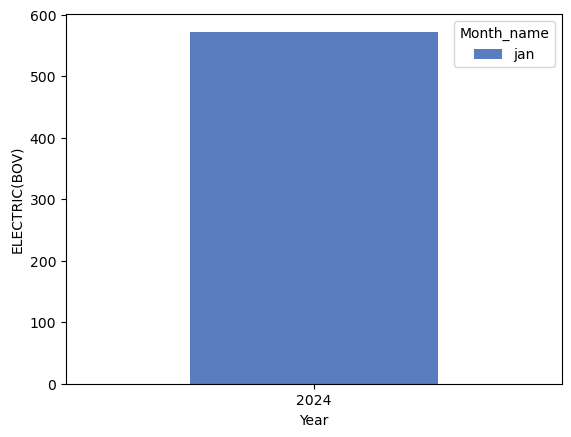

In [30]:
sns.barplot(data=EV_2024,x='Year',y='ELECTRIC(BOV)',hue='Month_name',palette='muted',width=0.5,ci=None)

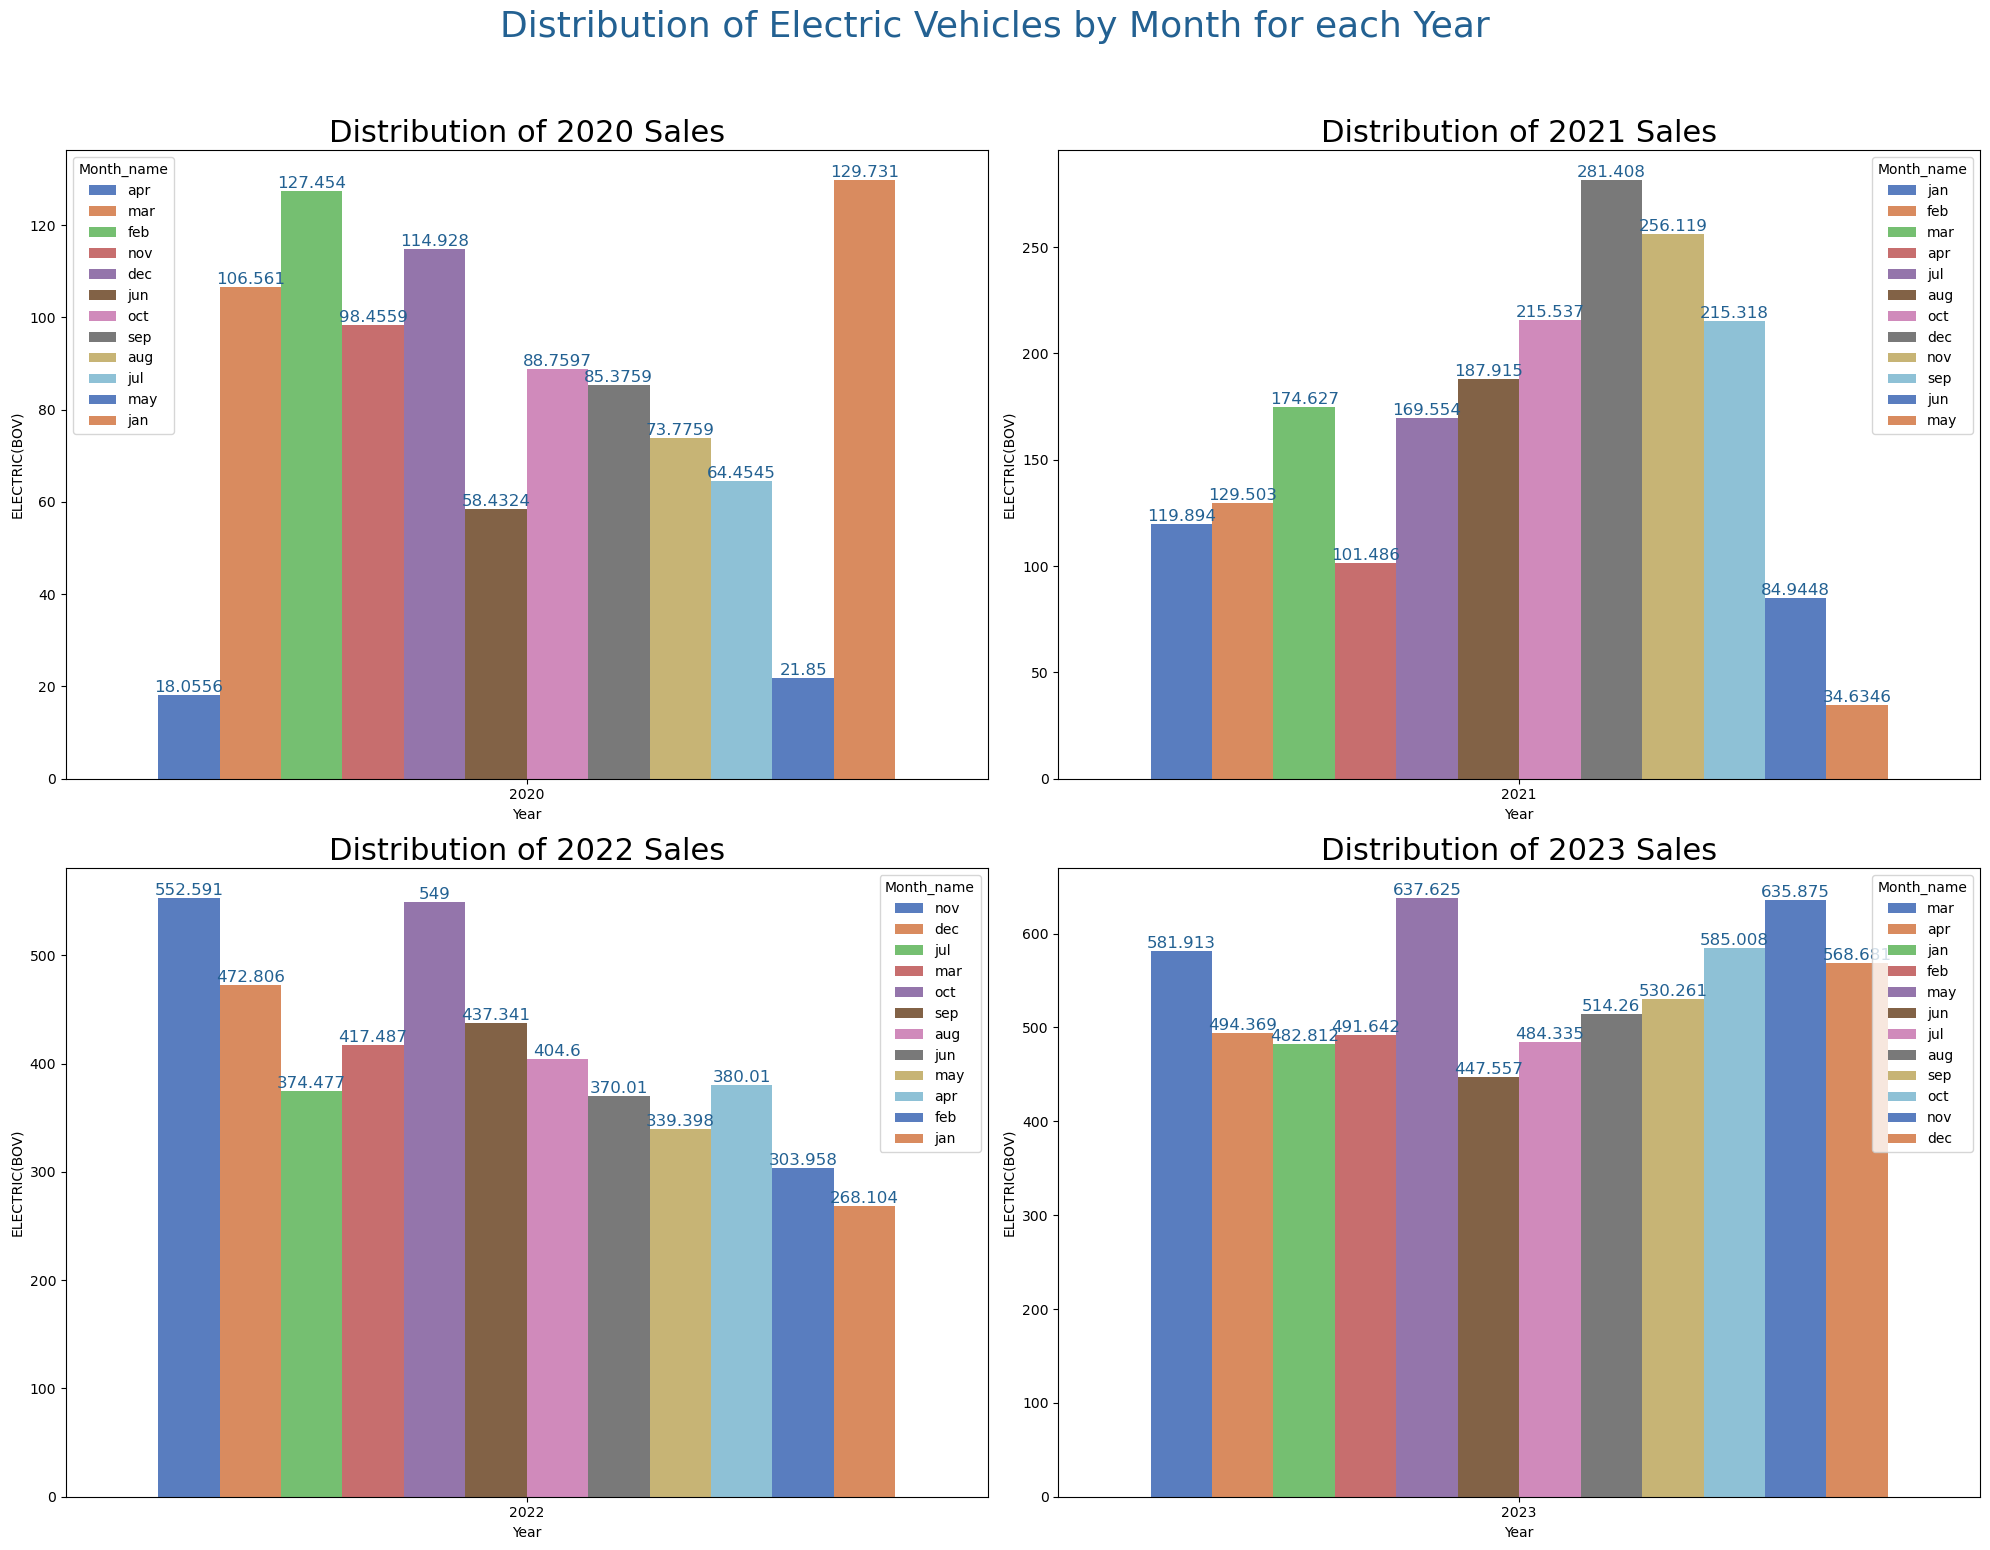

In [31]:
fig,ax=plt.subplots(2,2,figsize=(20,15))

sns.barplot(data=EV_2020,x='Year',y='ELECTRIC(BOV)',hue='Month_name',palette='muted',ci=None,ax=ax[0][0])
ax[0][0].set_title('Distribution of 2020 Sales',color='black',fontsize=22)
for c in ax[0][0].containers:
    ax[0][0].bar_label(c,color='#236192',fontsize=12)
    
sns.barplot(data=EV_2021,x='Year',y='ELECTRIC(BOV)',hue='Month_name',palette='muted',ci=None,ax=ax[0][1])
ax[0][1].set_title('Distribution of 2021 Sales',color='black',fontsize=22)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color='#236192', fontsize=12)
for c in ax[0][1].containers:
    ax[0][1].bar_label(c,color='#236192',fontsize=12)

sns.barplot(data=EV_2022,x='Year',y='ELECTRIC(BOV)',hue='Month_name',palette='muted',ci=None,ax=ax[1][0])
ax[1][0].set_title('Distribution of 2022 Sales',color='black',fontsize=22)
for c in ax[1][0].containers:
    ax[1][0].bar_label(c,color='#236192',fontsize=12)

sns.barplot(data=EV_2023,x='Year',y='ELECTRIC(BOV)',hue='Month_name',palette='muted',ci=None,ax=ax[1][1])
ax[1][1].set_title('Distribution of 2023 Sales',color='black',fontsize=22)
for c in ax[1][1].containers:
    ax[1][1].bar_label(c,color='#236192',fontsize=12)

plt.suptitle('Distribution of Electric Vehicles by Month for each Year', fontsize=26, color='#236192', y=1.03)
plt.tight_layout()
plt.show()

In [32]:
# Customer Segmentation based on Vehicle Category and States

In [33]:
EV_india_data['Vehicle Type'].value_counts()

Vehicle Type
2W_Personal           2596
4W_Personal           1130
3W_Shared_LowSpeed    1070
3W_Goods_LowSpeed      983
3W_Shared              892
3W_Goods               748
Others                 526
4W_Shared              497
Bus                    247
3W_Personal            130
2W_Shared               65
Name: count, dtype: int64

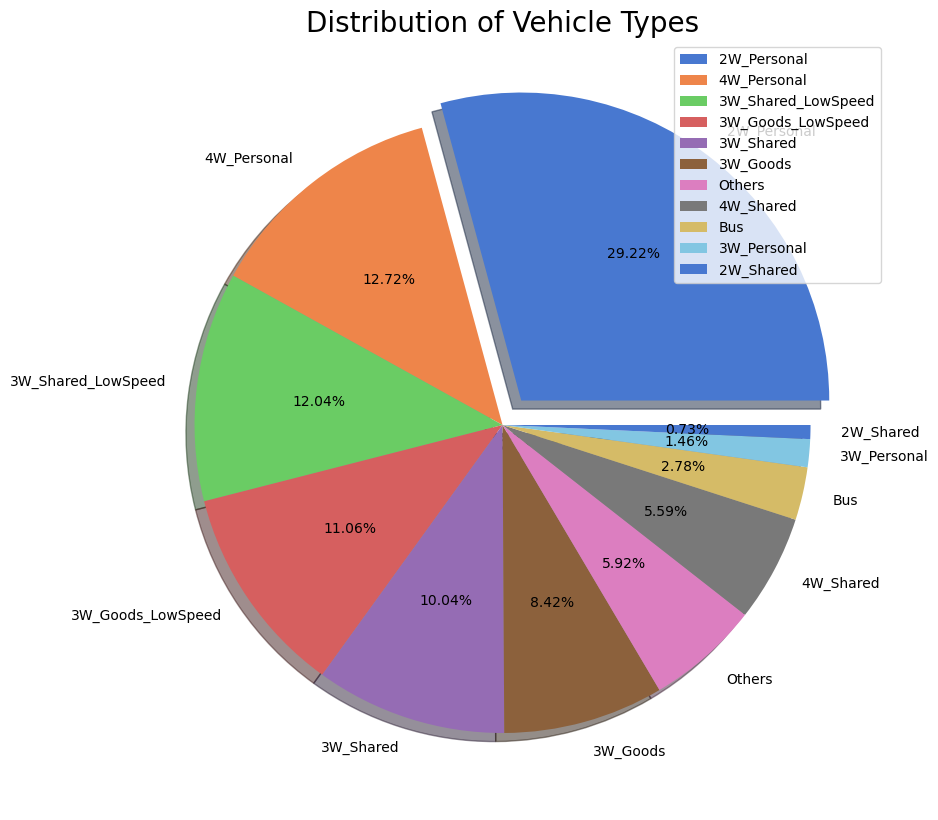

In [34]:
labels = ['2W_Personal','4W_Personal','3W_Shared_LowSpeed','3W_Goods_LowSpeed','3W_Shared','3W_Goods','Others','4W_Shared','Bus','3W_Personal','2W_Shared']
size = EV_india_data['Vehicle Type'].value_counts()
colors=sns.color_palette('muted')[0:11]
explode = [0.1,0,0,0,0,0,0,0,0,0,0]
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Vehicle Types', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [35]:
EV_india_data['Vehicle Category'].value_counts()

Vehicle Category
3-Wheelers    3823
2-Wheelers    2661
4-Wheelers    1627
Others         526
Bus            247
Name: count, dtype: int64

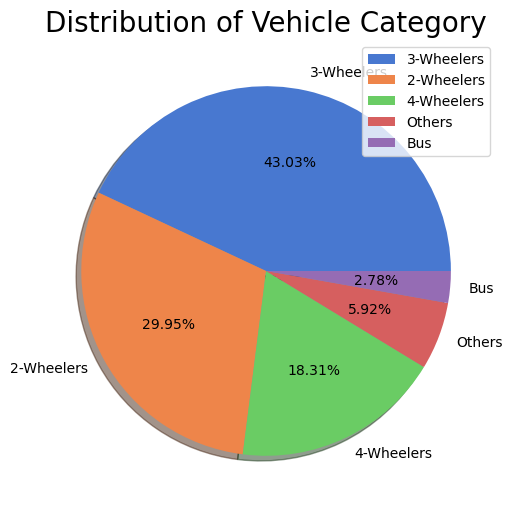

In [36]:
labels = ['3-Wheelers','2-Wheelers','4-Wheelers','Others','Bus']
size = EV_india_data['Vehicle Category'].value_counts()
colors=sns.color_palette('muted')[0:5]
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Vehicle Category', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

<Axes: xlabel='Vehicle Type', ylabel='ELECTRIC(BOV)'>

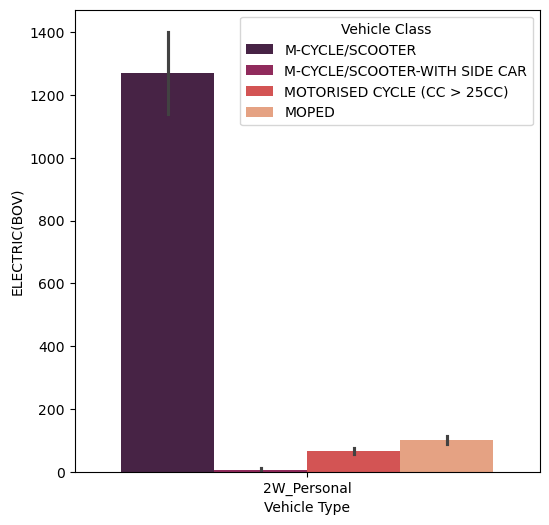

In [37]:
EV_2W = EV_india_data[EV_india_data['Vehicle Type'] == '2W_Personal']
plt.rcParams['figure.figsize'] = (6,6)
sns.barplot(data=EV_2W,x='Vehicle Type',y='ELECTRIC(BOV)',palette='rocket',hue='Vehicle Class')

<Axes: xlabel='Vehicle Class', ylabel='ELECTRIC(BOV)'>

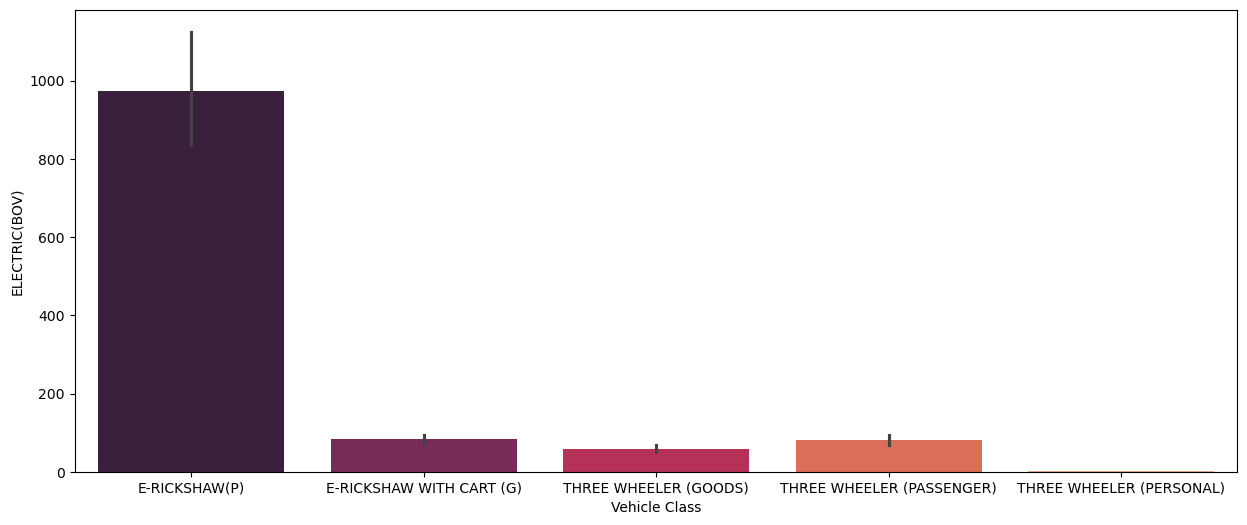

In [38]:
EV_3 = EV_india_data[EV_india_data['Vehicle Category'] == '3-Wheelers']
plt.rcParams['figure.figsize'] = (15,6)
sns.barplot(data=EV_3,x='Vehicle Class',y='ELECTRIC(BOV)',palette='rocket',hue='Vehicle Class')

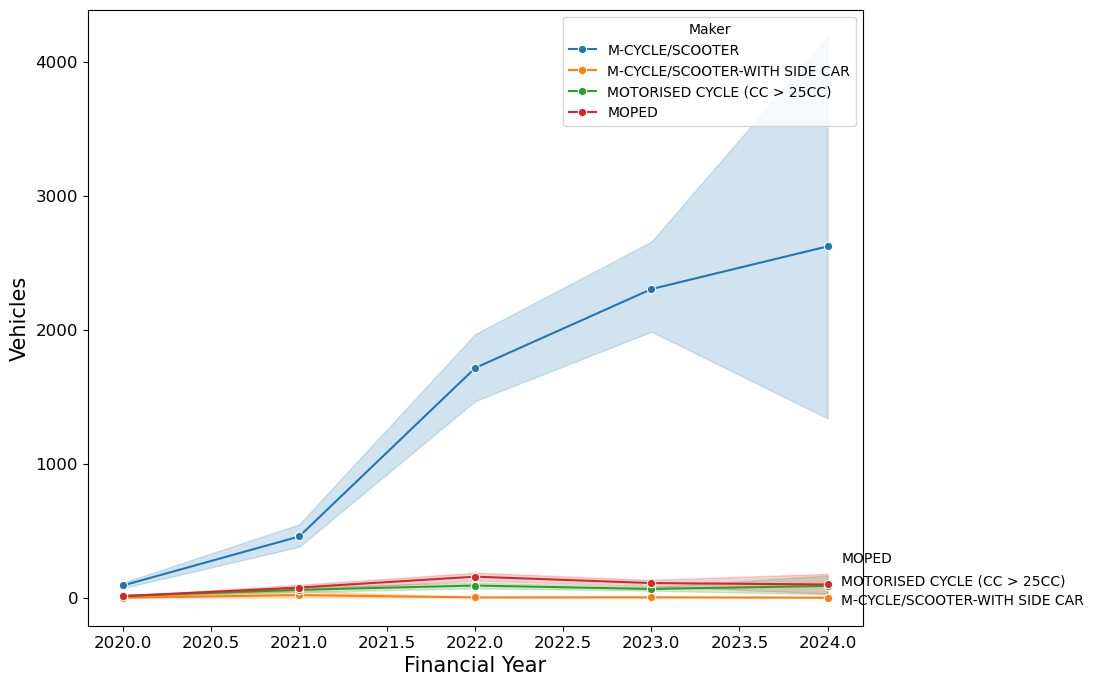

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(data=EV_2W, x='Year', y='ELECTRIC(BOV)', hue='Vehicle Class', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

# Annotate the last data point
for col in EV_2W['Vehicle Class'].unique()[::1]:
    last_point = EV_2W[EV_2W['Vehicle Class'] == col].iloc[-1]
    plt.annotate(f"{last_point['Vehicle Class']}", 
                 (last_point['Year'], last_point['ELECTRIC(BOV)']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
# ax.spines[['right', 'top']].set_visible(False)
# ax.get_legend().set_visible(False)
plt.show()

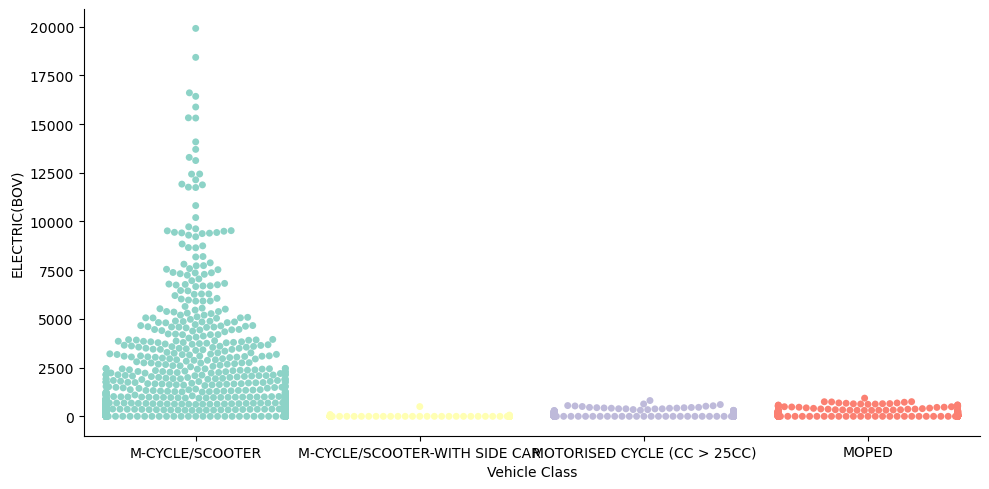

In [40]:
sns.catplot(x="Vehicle Class", y="ELECTRIC(BOV)",data=EV_2W,orient="v", height=5, aspect=2, palette="Set3",kind="swarm")

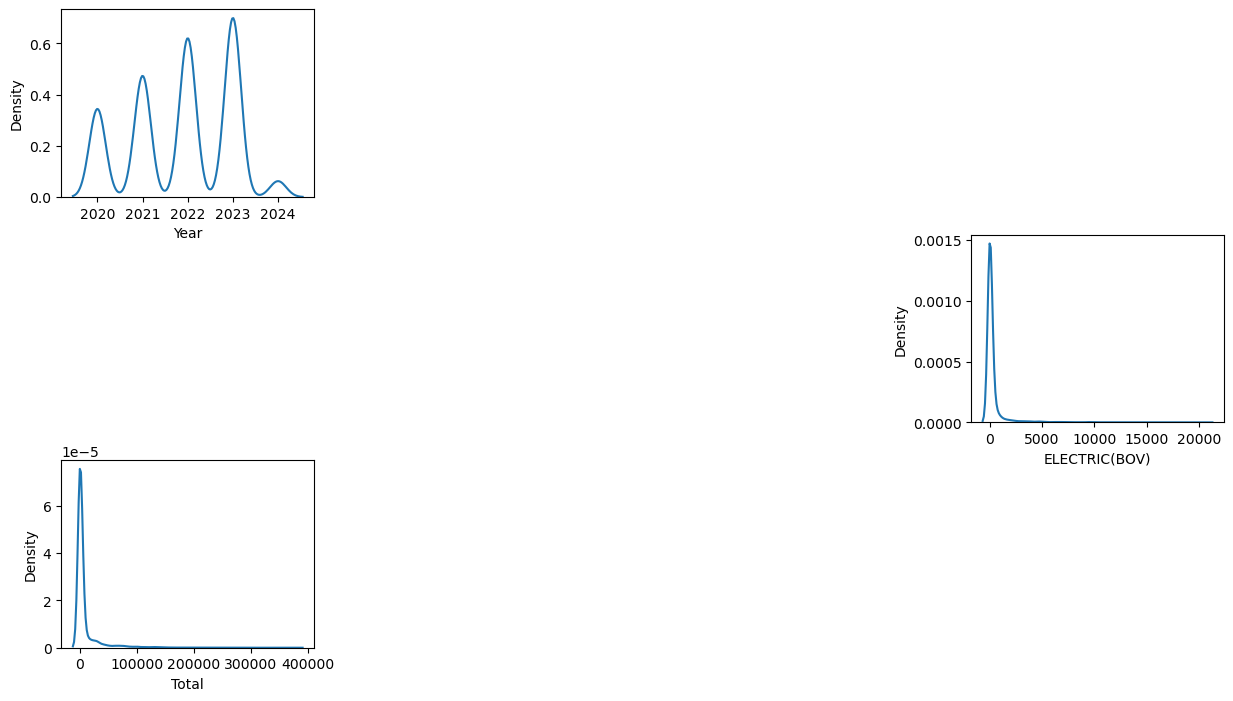

In [41]:
#It tells you where is the density of the atrributes in the dataset
plt.figure(figsize=(15,20))
for i, col in enumerate (EV_india_data.columns):
  if EV_india_data[col].dtype != 'object':
    ax = plt.subplot(7,4, i+1)
    sns.kdeplot(EV_india_data[col], ax=ax)
    plt.xlabel(col)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'M-CYCLE/SCOOTER'),
  Text(1, 0, 'MOTOR CAR'),
  Text(2, 0, 'MOTOR CYCLE/SCOOTER-USED FOR HIRE'),
  Text(3, 0, 'MOTOR CAB'),
  Text(4, 0, 'BUS'),
  Text(5, 0, 'E-RICKSHAW(P)'),
  Text(6, 0, 'E-RICKSHAW WITH CART (G)'),
  Text(7, 0, 'MAXI CAB'),
  Text(8, 0, 'THREE WHEELER (GOODS)'),
  Text(9, 0, 'THREE WHEELER (PASSENGER)'),
  Text(10, 0, 'GOODS CARRIER'),
  Text(11, 0, 'M-CYCLE/SCOOTER-WITH SIDE CAR'),
  Text(12, 0, 'MOTORISED CYCLE (CC > 25CC)'),
  Text(13, 0, 'MOPED'),
  Text(14, 0, 'AGRICULTURAL TRACTOR'),
  Text(15, 0, 'CONSTRUCTION EQUIPMENT VEHICLE'),
  Text(16, 0, 'ADAPTED VEHICLE'),
  Text(17, 0, 'EXCAVATOR (COMMERCIAL)'),
  Text(18, 0, 'THREE WHEELER (PERSONAL)'),
  Text(19, 0, 'TRAILER (AGRICULTURAL)'),
  Text(20, 0, 'OMNI BUS'),
  Text(21, 0, 'FORK LIFT'),
  Text(

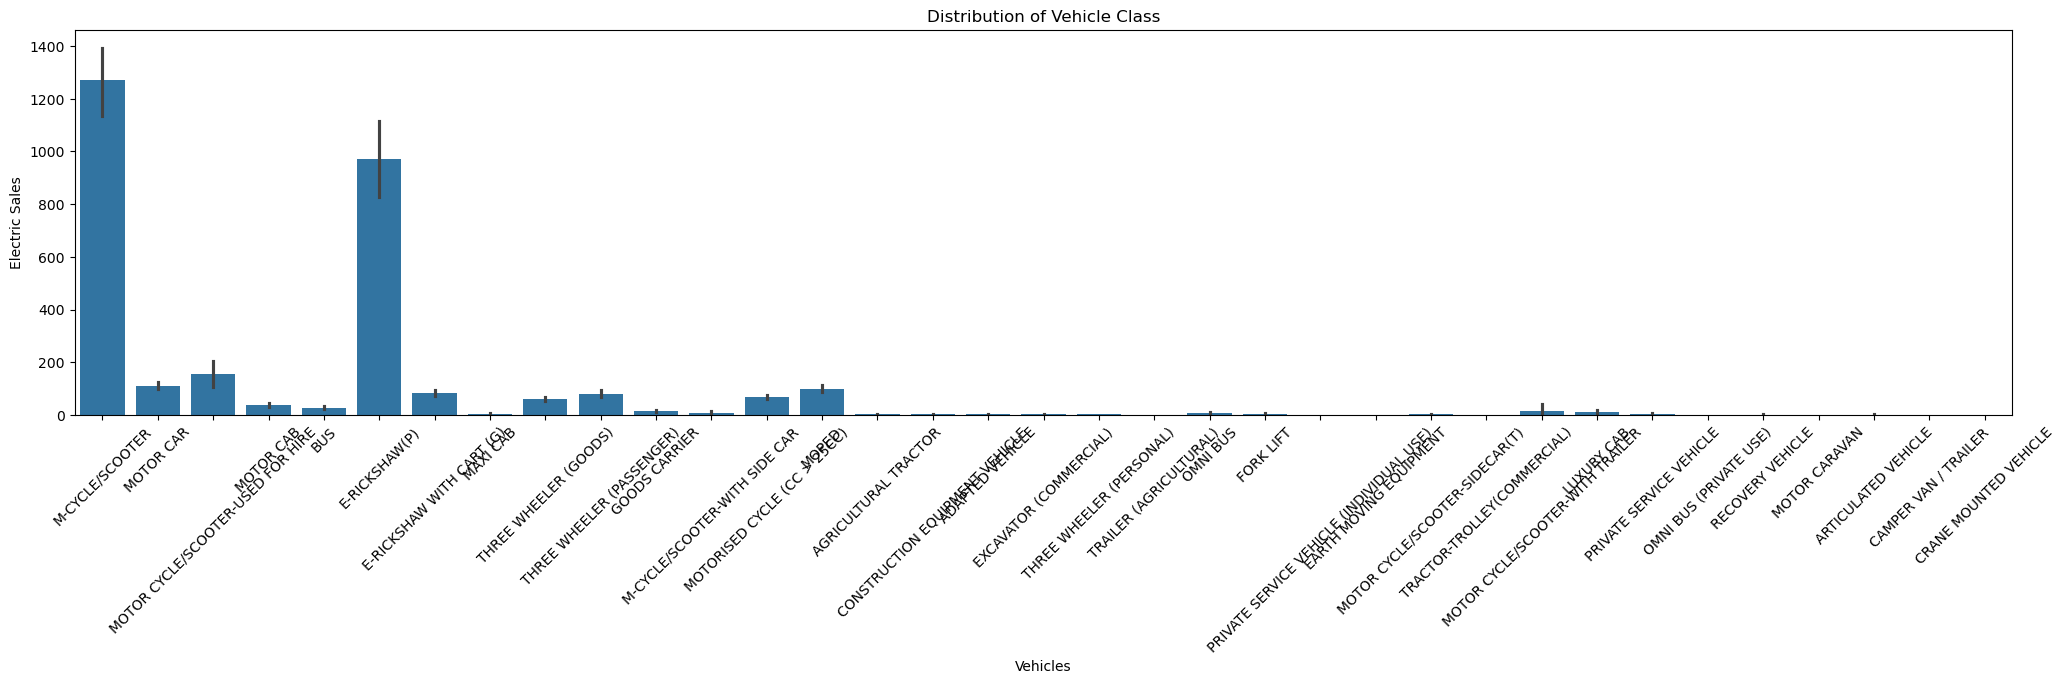

In [42]:
a=np.arange(1,104)
ax= plt.figure(figsize=(25,5))
sns.barplot(x='Vehicle Class',y='ELECTRIC(BOV)',data=EV_india_data)
plt.title('Distribution of Vehicle Class')
plt.xlabel('Vehicles')
plt.ylabel('Electric Sales')
plt.xticks(rotation=45)

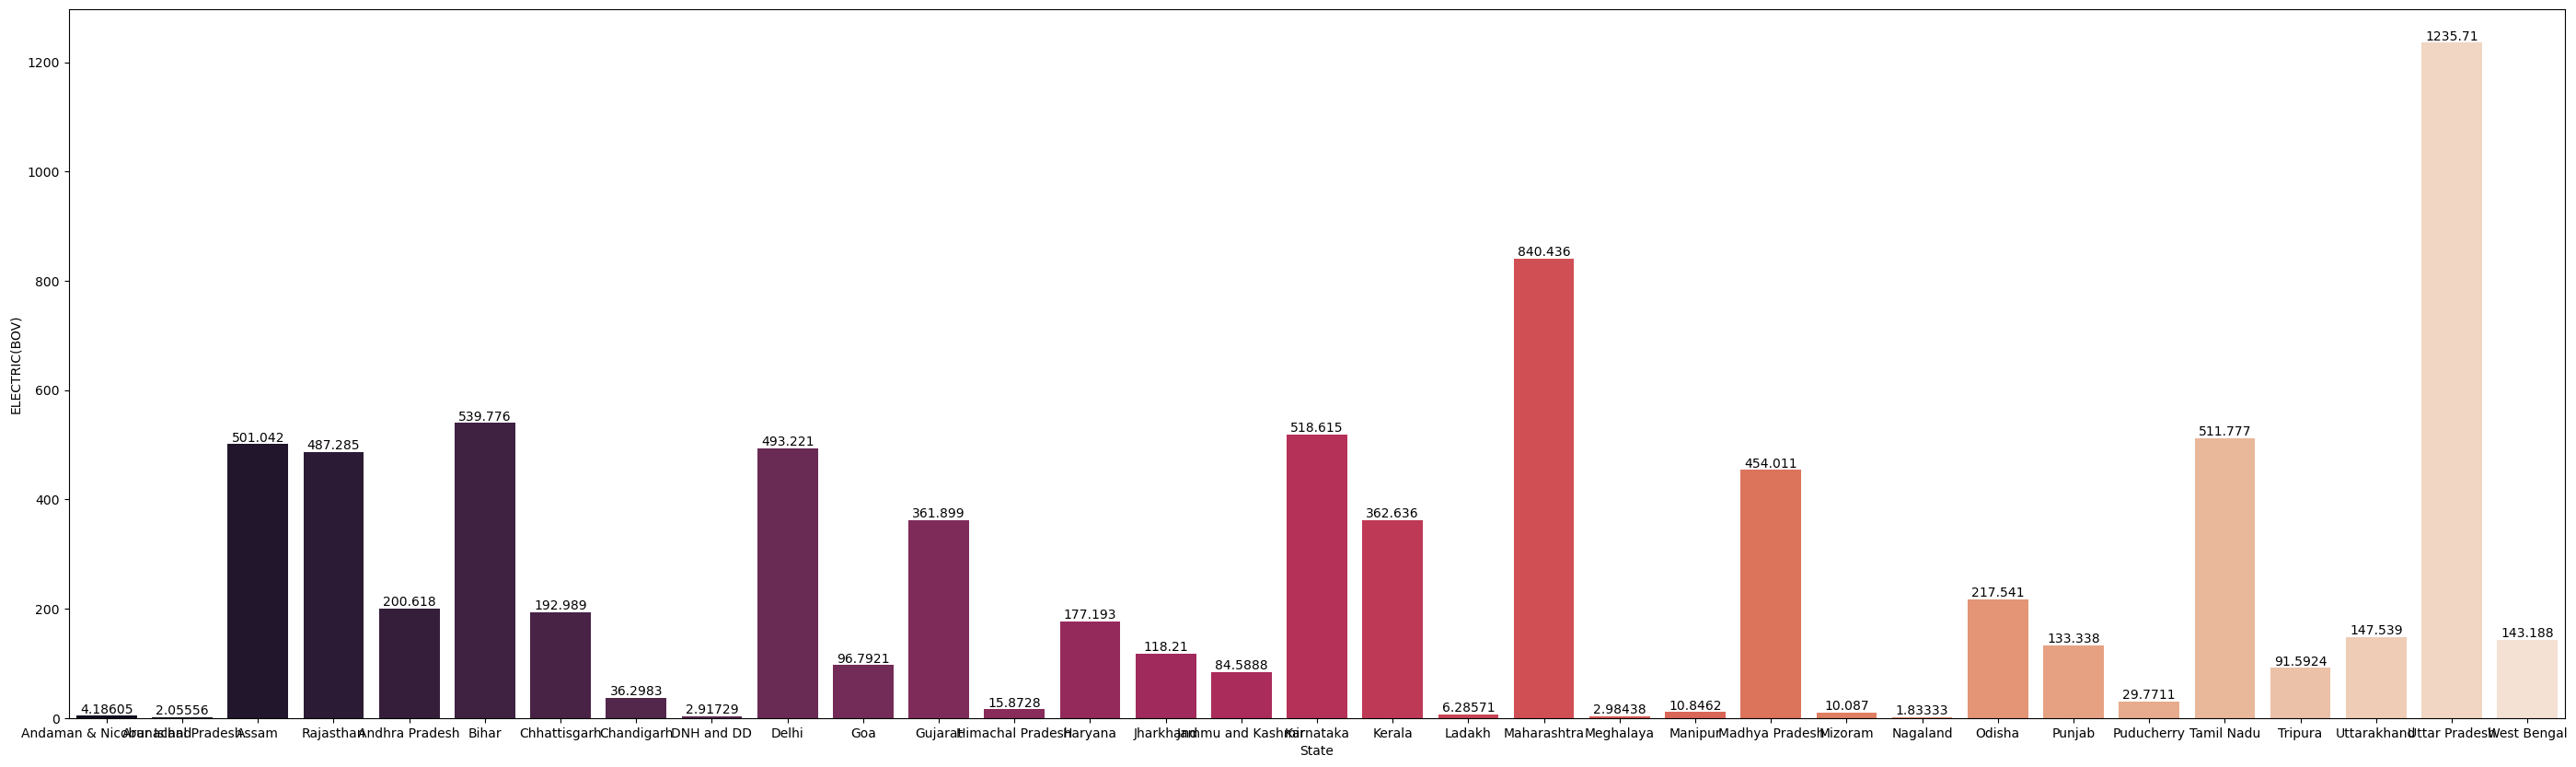

In [43]:
fig = plt.figure(figsize=(35,10))
ax = sns.barplot(data=EV_india_data,x='State',y='ELECTRIC(BOV)',ci=None,palette='rocket')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [44]:
EV_india_data['State'].value_counts()

State
Karnataka                   587
Gujarat                     483
Maharashtra                 459
Uttar Pradesh               458
Rajasthan                   428
Haryana                     404
Tamil Nadu                  394
Odisha                      386
Andhra Pradesh              369
Delhi                       367
Kerala                      365
West Bengal                 362
Chhattisgarh                359
Punjab                      358
Jharkhand                   353
Bihar                       348
Chandigarh                  295
Uttarakhand                 280
Madhya Pradesh              274
Assam                       259
Jammu and Kashmir           197
Tripura                     184
Goa                         178
Himachal Pradesh            173
Puducherry                  166
DNH and DD                  133
Manipur                      91
Meghalaya                    64
Andaman & Nicobar Island     43
Mizoram                      23
Arunachal Pradesh            18
La

<Axes: xlabel='ELECTRIC(BOV)', ylabel='State'>

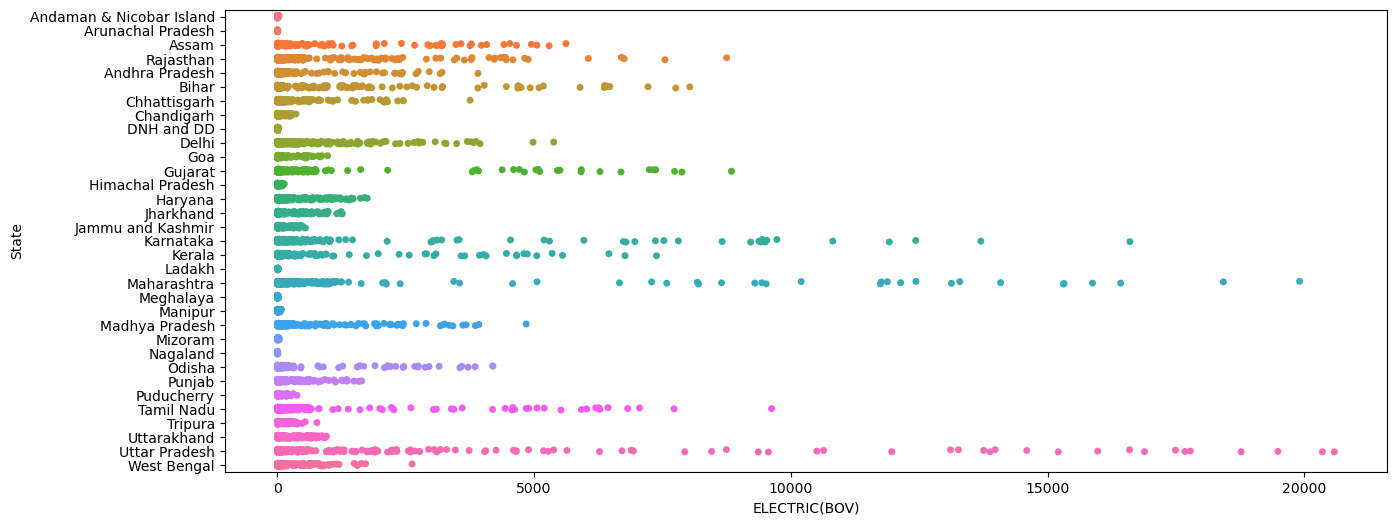

In [45]:
sns.stripplot(data=EV_india_data, x="ELECTRIC(BOV)", y="State", hue="State", legend=False)

In [46]:
# The highest sales of Electric vehicles were in Uttar Pradesh , which was followed by Maharashtra, Bihar , Karnataka , Tamil Nadu and Delhi

In [47]:
# The maximum number of electric vehicle were sold during 2023, we will see the state distribution for that.

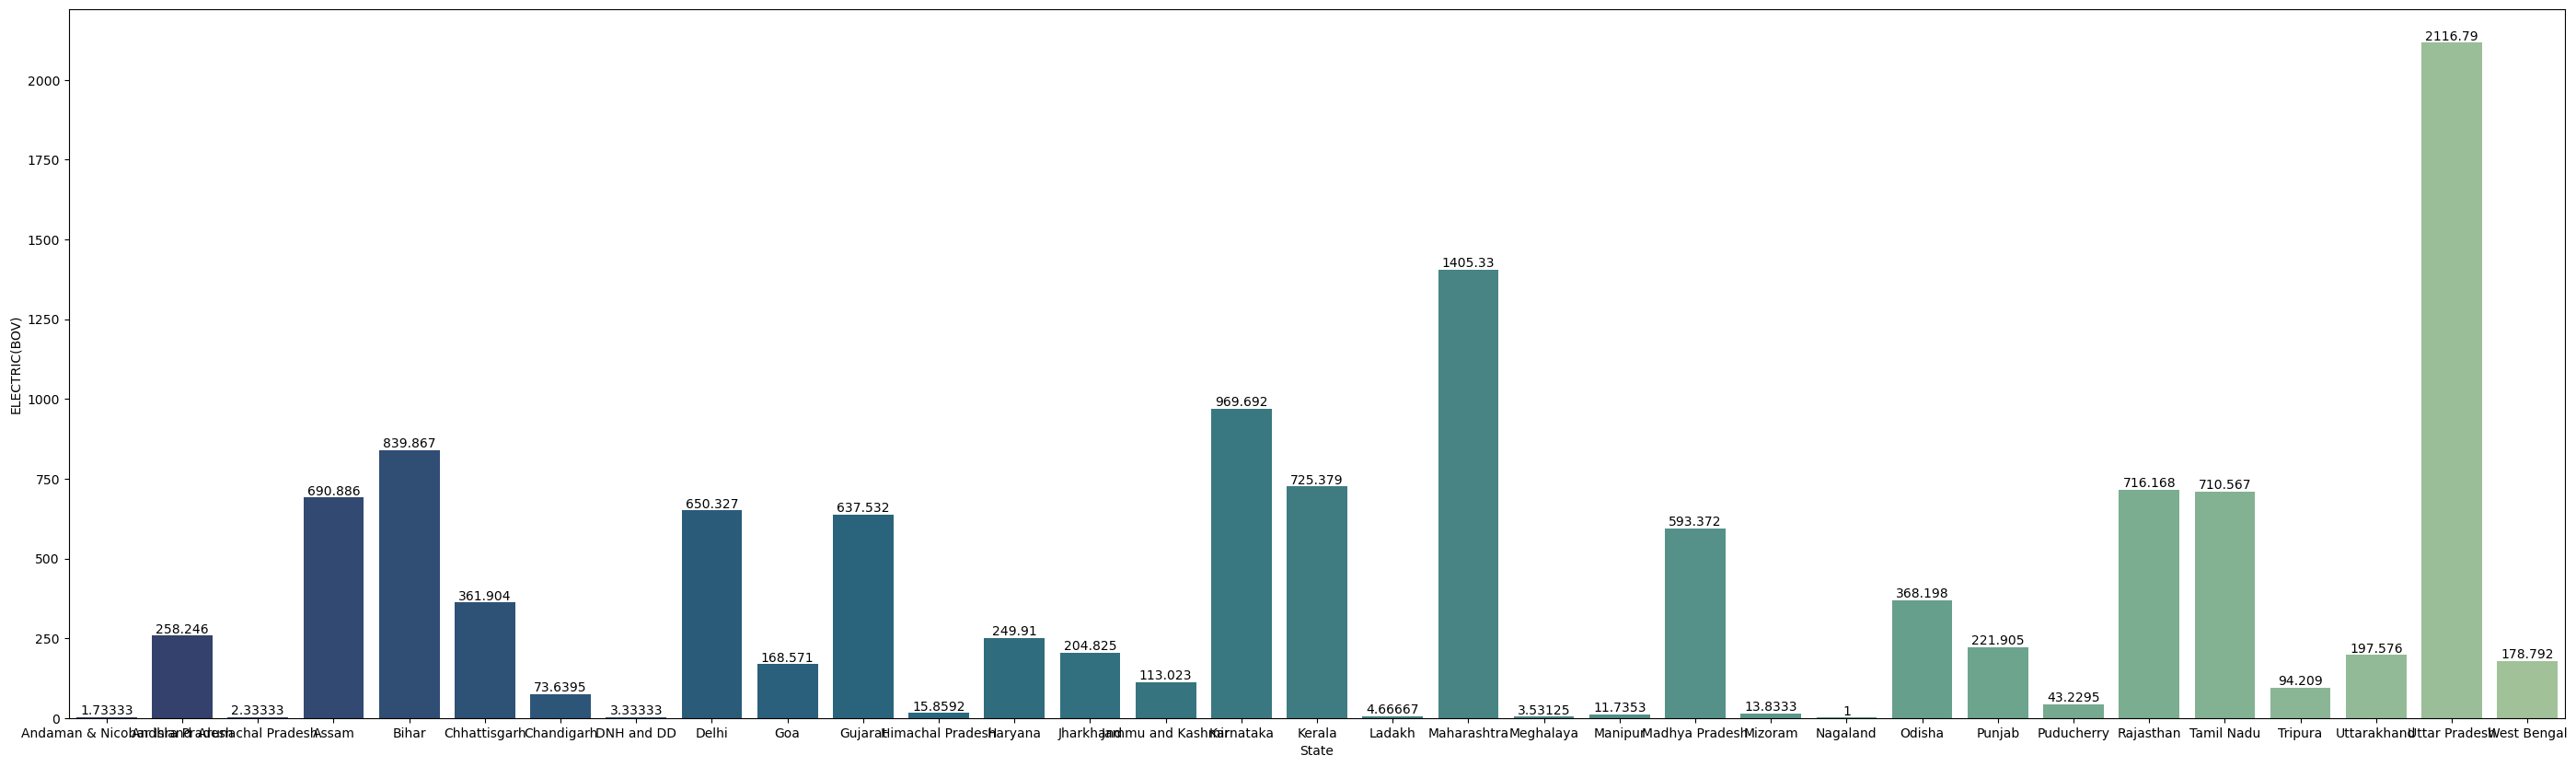

In [48]:
fig = plt.figure(figsize=(35,10))
ax = sns.barplot(data=EV_2023,x='State',y='ELECTRIC(BOV)',ci=None,palette='crest_r')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [49]:
# Taking the states with the highest sales for analysis

In [50]:
EV_state_sales = EV_india_data[(EV_india_data['State'] == 'Uttar Pradesh') | (EV_india_data['State'] == 'Maharashtra') | (EV_india_data['State'] == 'Bihar') | (EV_india_data['State'] == 'Karnataka' ) | (EV_india_data['State'] == ' Tamil Nadu') | (EV_india_data['State'] == 'Delhi')]
EV_state_sales

,Year,Month_name,Date,State,Vehicle Class,Vehicle Category,Vehicle Type,ELECTRIC(BOV),Total
459,2022,jan,1/1/2022,Bihar,ADAPTED VEHICLE,Others,Others,1,2
460,2022,jan,1/1/2022,Bihar,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,2518,2519
461,2022,jan,1/1/2022,Bihar,E-RICKSHAW WITH CART (G),3-Wheelers,3W_Goods_LowSpeed,54,54
462,2022,jan,1/1/2022,Bihar,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,399,50105
463,2022,jan,1/1/2022,Bihar,MOPED,2-Wheelers,2W_Personal,10,1013
...,...,...,...,...,...,...,...,...,...
8879,2024,jan,1/1/2024,Karnataka,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,40,158
8880,2024,jan,1/1/2024,Karnataka,MOTORISED CYCLE (CC > 25CC),2-Wheelers,2W_Personal,147,319
8881,2024,jan,1/1/2024,Karnataka,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,259,907
8882,2024,jan,1/1/2024,Karnataka,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,292,4917


Text(0.5, 1.0, 'Boxplot for Electric Vehicle by state')

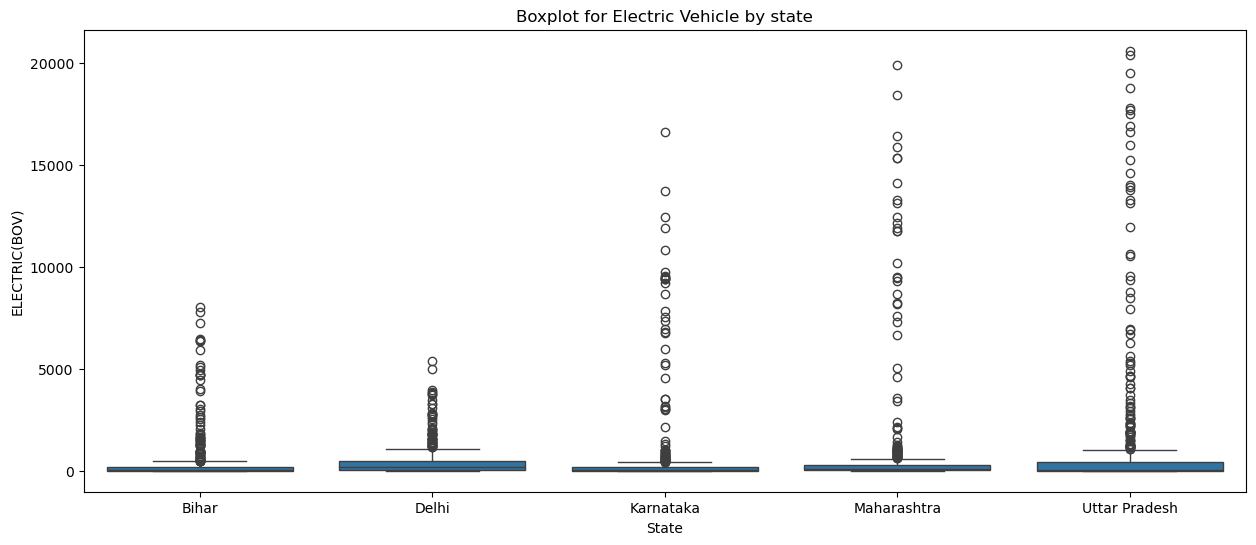

In [51]:
ax = sns.boxplot(
                 x="State", 
                 y="ELECTRIC(BOV)", 
                 data=EV_state_sales) 
# Set title 
plt.title("Boxplot for Electric Vehicle by state") 

<Axes: xlabel='ELECTRIC(BOV)', ylabel='State'>

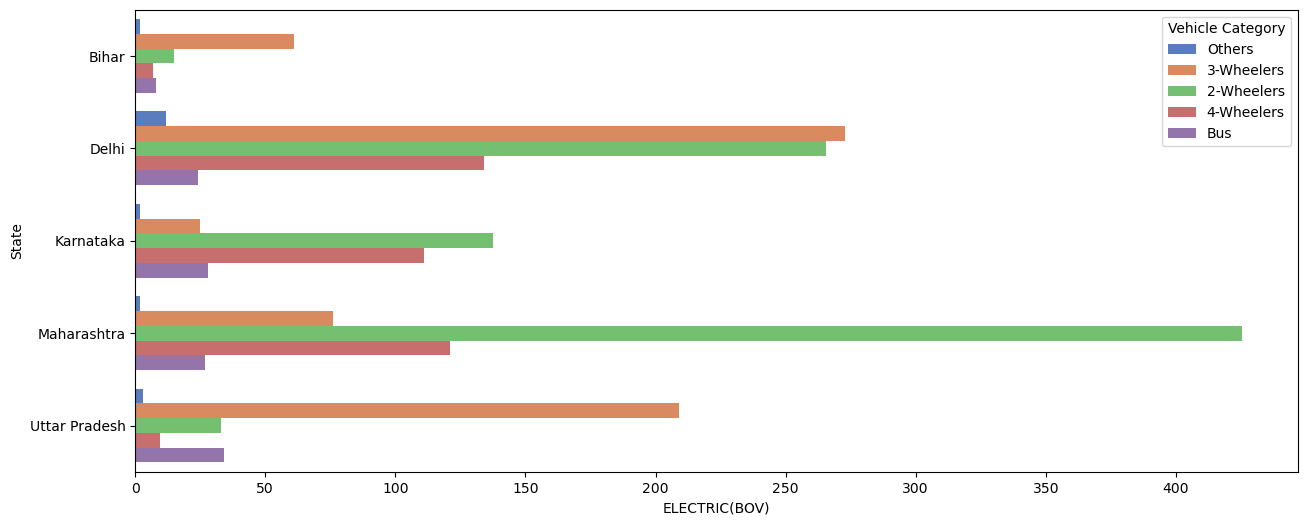

In [52]:
sns.barplot(data=EV_state_sales,x='ELECTRIC(BOV)',y='State',hue='Vehicle Category',palette='muted',estimator='median',ci=None,capsize=0.2)

<Axes: xlabel='ELECTRIC(BOV)', ylabel='State'>

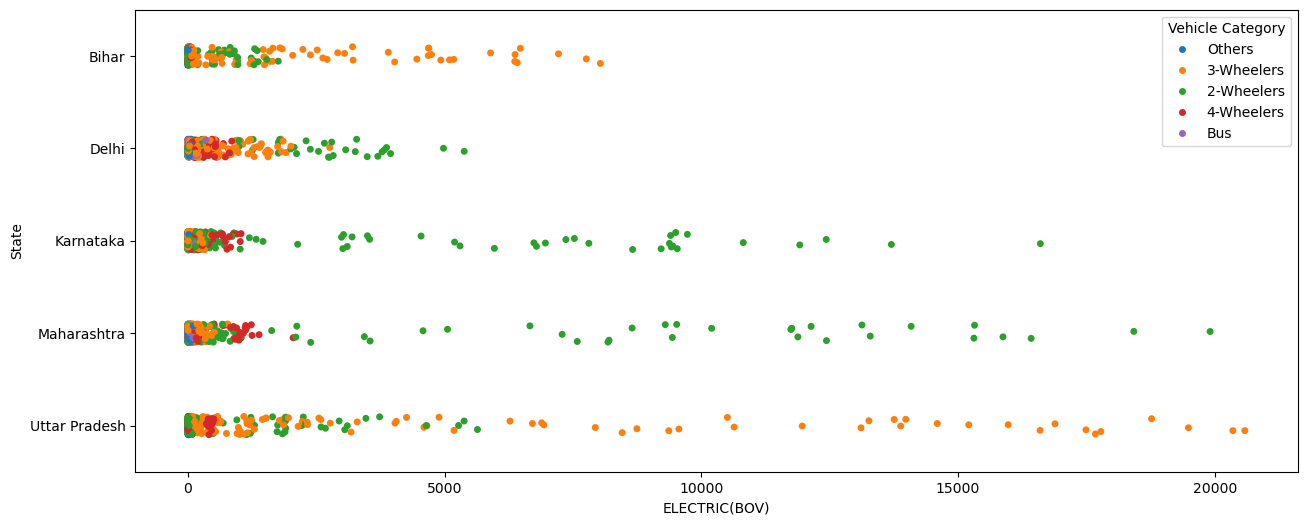

In [53]:
sns.stripplot(data=EV_state_sales, x="ELECTRIC(BOV)", y="State", hue="Vehicle Category", legend=True)

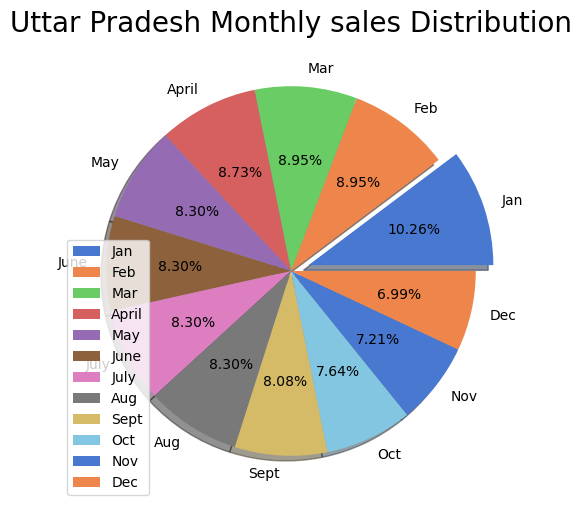

In [54]:
EV_UP = EV_state_sales[EV_state_sales['State']=='Uttar Pradesh']
labels = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
size = EV_UP['Month_name'].value_counts()
colors=sns.color_palette('muted')[0:12]
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0]
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Uttar Pradesh Monthly sales Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

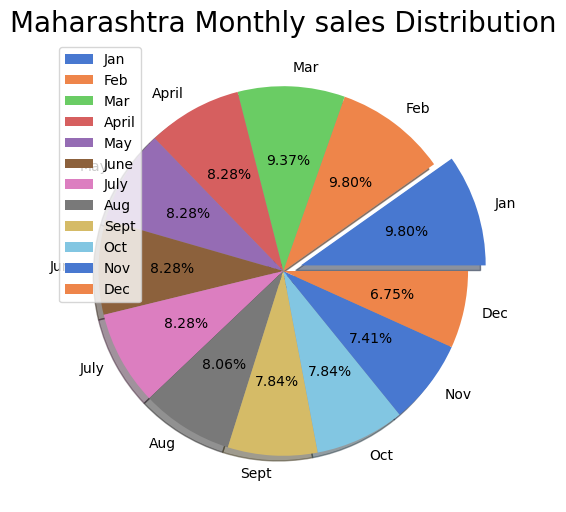

In [55]:
EV_MA = EV_state_sales[EV_state_sales['State']=='Maharashtra']
labels = ['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
size = EV_MA['Month_name'].value_counts()
colors=sns.color_palette('muted')[0:12]
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0]
plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Maharashtra Monthly sales Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### K-Means Clustering for Customer Segmentaion

In [56]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [57]:
EV_india_data.columns

Index(['Year', 'Month_name', 'Date', 'State', 'Vehicle Class',
       'Vehicle Category', 'Vehicle Type', 'ELECTRIC(BOV)', 'Total'],
      dtype='object')

In [58]:
EV_india_seg1 = EV_india_data.drop(columns=['Year','Month_name','Date','ELECTRIC(BOV)','Total'])

In [59]:
EV_india_seg1['Vehicle Class']= label_encode(EV_india_seg1,'Vehicle Class')
EV_india_seg1['Vehicle Category']= label_encode(EV_india_seg1,'Vehicle Category')
EV_india_seg1['Vehicle Type']= label_encode(EV_india_seg1,'Vehicle Type')
EV_india_seg1['State']= label_encode(EV_india_seg1,'State')

In [60]:
EV_india_seg1.head()

,State,Vehicle Class,Vehicle Category,Vehicle Type
0,0,14,0,0
1,0,19,2,7
2,0,22,0,1
3,0,18,2,8
4,0,22,0,1


In [61]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(EV_india_seg1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,8.884000e+03,8.884000e+03,8.884000e+03,8.884000e+03
mean,1.151713e-16,1.919521e-17,-1.279681e-16,-9.757566e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.745649e+00,-2.003700e+00,-1.058583e+00,-1.217617e+00
25%,-8.003832e-01,-1.064910e+00,-1.058583e+00,-1.217617e+00
50%,-1.702060e-01,-8.770776e-03,-1.107447e-01,8.870084e-03
75%,9.851189e-01,8.126706e-01,8.370935e-01,9.287358e-01
max,1.615296e+00,1.986158e+00,2.732770e+00,1.848601e+00


In [62]:
data_scaled.shape

(8884, 4)

In [63]:
EV_india_seg1.shape

(8884, 4)

Text(0, 0.5, 'Inertia')

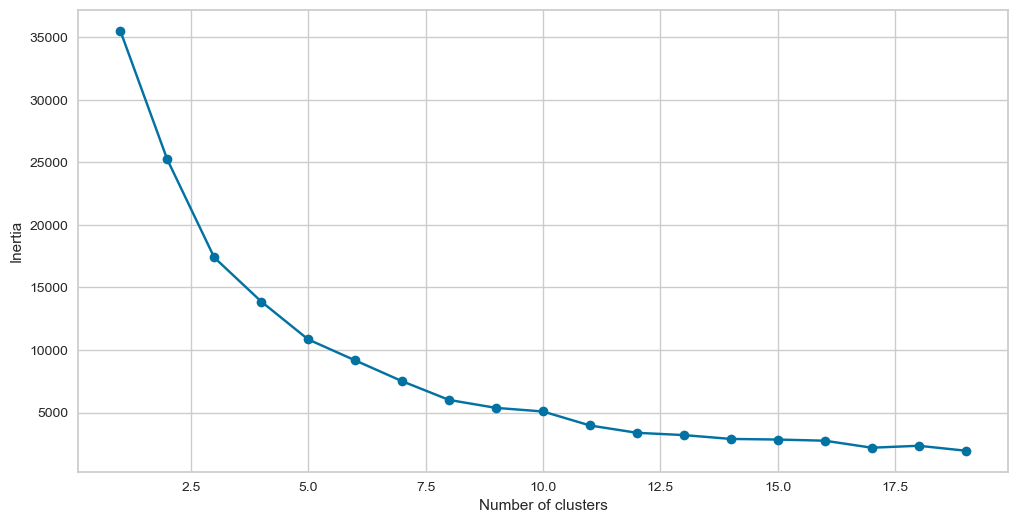

In [64]:
# fitting multiple k-means algorithms and storing the values in an empty list
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

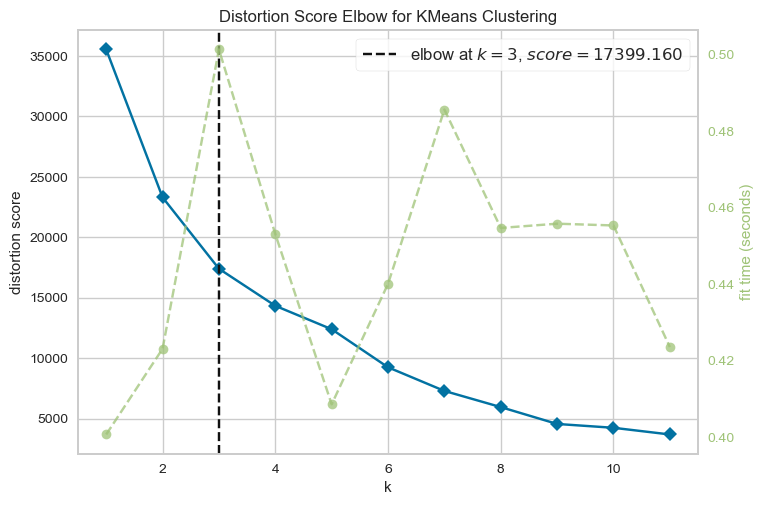

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_scaled)
visualizer.show()

In [66]:
# optimal number of clusters is 4

In [67]:

# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [68]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
2    3381
1    2661
0    2086
3     756
Name: count, dtype: int64

In [69]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_scaled)
EV_india_seg1['cluster_numbers'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 3 2 ... 1 1 1]
14301.819273093113
14
[[ 0.98245707 -0.62159897  0.57586248  0.70872564]
 [ 0.01233544  1.59336119 -0.10913912 -0.09466458]
 [ 0.0572593  -0.02376461 -1.05858294 -1.21012765]
 [-0.79553822 -0.61817693  0.75038742  0.79963811]]


In [70]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 2661, 3: 2558, 0: 1894, 1: 1771})

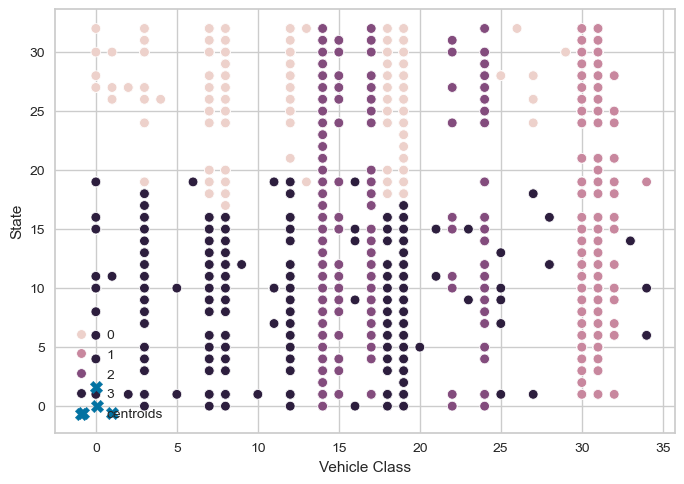

In [71]:
#Visulazing clusters
sns.scatterplot(data=EV_india_seg1, x="Vehicle Class", y="State", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="b", s=80, label="centroids")
plt.legend()
plt.show()

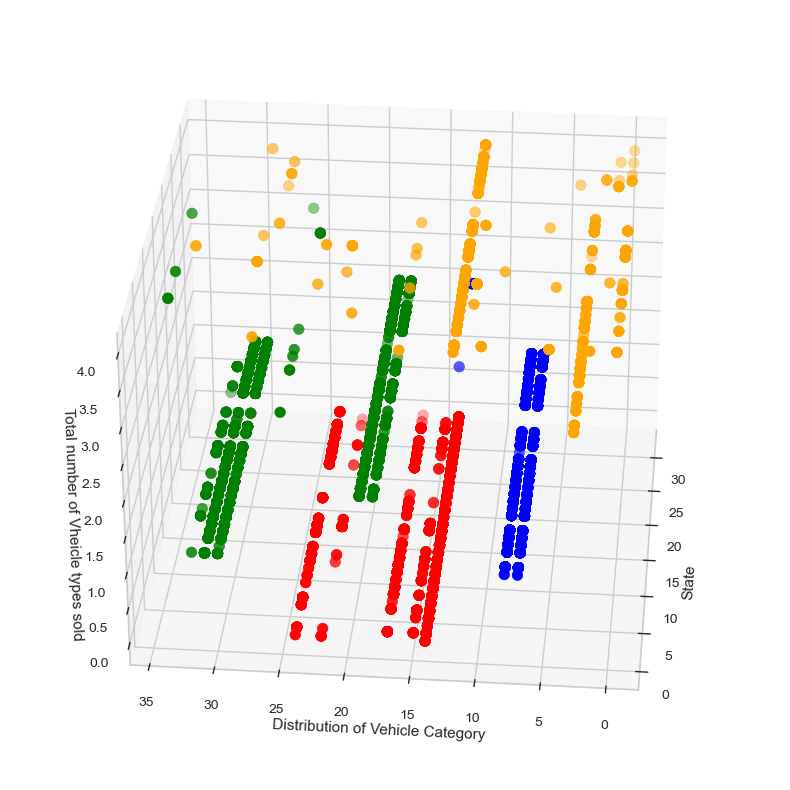

In [72]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(EV_india_seg1.State[frame.cluster == 0], EV_india_seg1["Vehicle Class"][frame.cluster == 0], EV_india_seg1["Vehicle Category"][frame.cluster == 0], c='blue', s=60)
ax.scatter(EV_india_seg1.State[frame.cluster == 1], EV_india_seg1["Vehicle Class"][frame.cluster == 1], EV_india_seg1["Vehicle Category"][frame.cluster == 1], c='red', s=60)
ax.scatter(EV_india_seg1.State[frame.cluster == 2], EV_india_seg1["Vehicle Class"][frame.cluster == 2], EV_india_seg1["Vehicle Category"][frame.cluster == 2], c='green', s=60)
ax.scatter(EV_india_seg1.State[frame.cluster == 3], EV_india_seg1["Vehicle Class"][frame.cluster == 3], EV_india_seg1["Vehicle Category"][frame.cluster == 3], c='orange', s=60)
ax.view_init(30, 185)
ax.view_init(30, 185)
plt.xlabel("State")
plt.ylabel("Distribution of Vehicle Category")
ax.set_zlabel('Total number of Vheicle types sold')
plt.show()

In [73]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(frame['cluster'],EV_india_seg1['Vehicle Category'])
crosstab

Vehicle Category,0,1,2,3,4
cluster,,,,,
0,0,2053,33,0,0
1,2661,0,0,0,0
2,0,1770,1594,13,4
3,0,0,0,234,522


<Figure size 3000x2000 with 0 Axes>

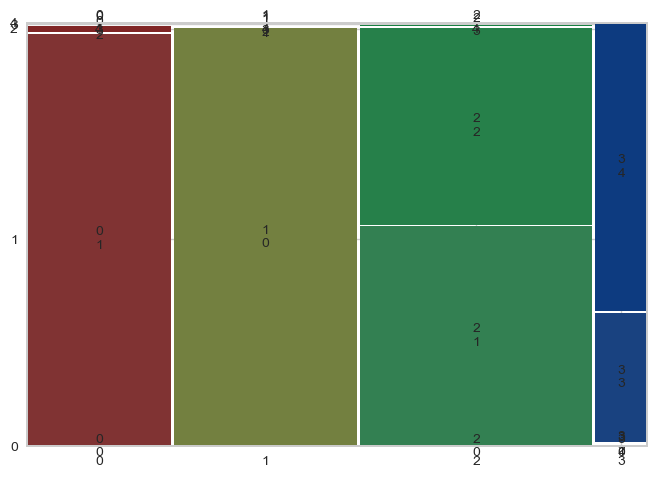

In [74]:
fig = plt.figure(figsize=(30,20))
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster', ylabel='Vehicle Category'>

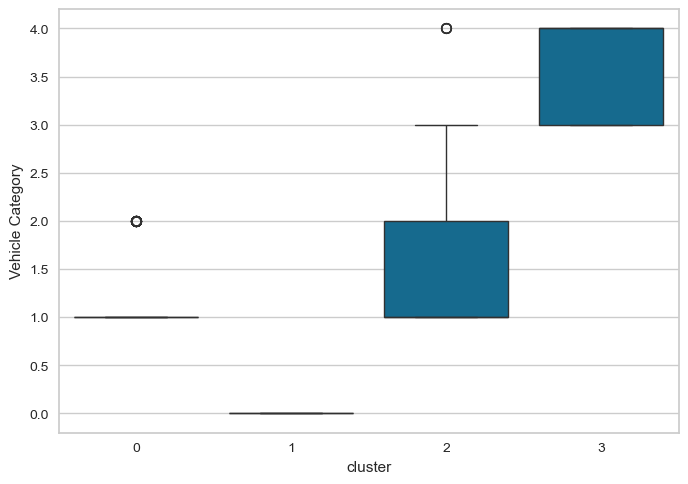

In [75]:
sns.boxplot(x= frame['cluster'],y='Vehicle Category', data=EV_india_seg1)

In [76]:
# Selecting Target Segment

#Calculating the mean
# VEHICLE TYPE
EV_india_seg1['Vehicle Type'] = LabelEncoder().fit_transform(EV_india_seg1['Vehicle Type'])
vehicle_type = EV_india_seg1.groupby('cluster_numbers')['Vehicle Type'].mean()
vehicle_type = vehicle_type.to_frame().reset_index()
vehicle_type

,cluster_numbers,Vehicle Type
0,0,6.282471
1,1,3.662338
2,2,0.024427
3,3,6.578968


In [77]:
# Vehicle Category
EV_india_seg1['Vehicle Cateogry'] = LabelEncoder().fit_transform(EV_india_seg1['Vehicle Category'])
vehicle_cat = EV_india_seg1.groupby('cluster_numbers')['Vehicle Category'].mean()
vehicle_cat = vehicle_cat.to_frame().reset_index()
vehicle_cat

,cluster_numbers,Vehicle Category
0,0,1.724393
1,1,1.001694
2,2,0.000000
3,3,1.908522


In [78]:
# Vehicle Class
EV_india_seg1['Vehicle Class'] = LabelEncoder().fit_transform(EV_india_seg1['Vehicle Class'])
vehicle_class = EV_india_seg1.groupby('cluster_numbers')['Vehicle Class'].mean()
vehicle_class = vehicle_class.to_frame().reset_index()
vehicle_class

,cluster_numbers,Vehicle Class
0,0,11.777719
1,1,30.652739
2,2,16.872228
3,3,11.806880


In [79]:
# State
EV_india_seg1['State'] = LabelEncoder().fit_transform(EV_india_seg1['State'])
State = EV_india_seg1.groupby('cluster_numbers')['State'].mean()
State = State.to_frame().reset_index()
State

,cluster_numbers,State
0,0,25.974657
1,1,16.738001
2,2,17.165727
3,3,9.046130


In [80]:
segment = vehicle_class.merge(State, on='cluster_numbers', how='left').merge(vehicle_type, on='cluster_numbers', how='left').merge(vehicle_cat, on='cluster_numbers', how='left')
segment

,cluster_numbers,Vehicle Class,State,Vehicle Type,Vehicle Category
0,0,11.777719,25.974657,6.282471,1.724393
1,1,30.652739,16.738001,3.662338,1.001694
2,2,16.872228,17.165727,0.024427,0.000000
3,3,11.806880,9.046130,6.578968,1.908522


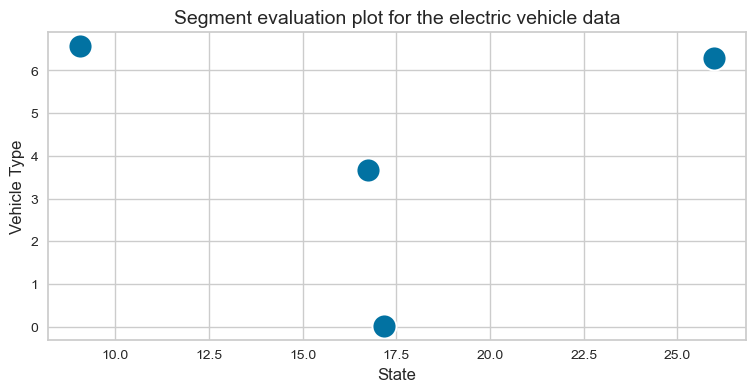

In [81]:
#Target segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "State", y = "Vehicle Type",data=segment,s=300, color="b")
plt.title("Segment evaluation plot for the electric vehicle data",
          fontsize = 14) 
plt.xlabel("State", fontsize = 12) 
plt.ylabel("Vehicle Type", fontsize = 12) 
plt.show()

In [82]:
data_scaled = scaler.fit_transform(EV_india_seg1)

In [83]:
data_scaled.shape

(8884, 6)

In [84]:
data_clust = pd.DataFrame(data_scaled, columns = EV_india_seg1.columns)

In [85]:
columns_segment = data_clust.columns
data_pivot = EV_india_seg1[columns_segment].groupby('cluster_numbers').mean().T

In [86]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

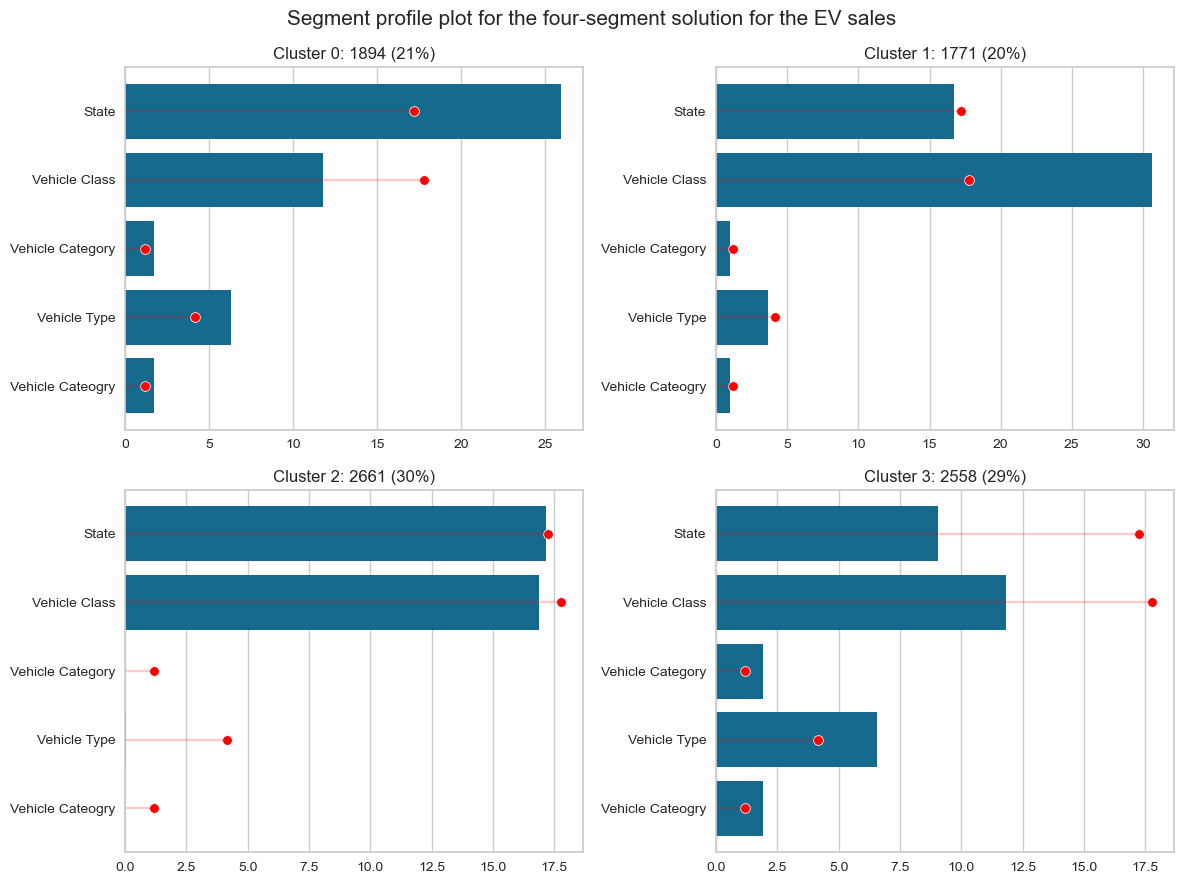

In [87]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2,2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {EV_india_seg1['cluster_numbers'].value_counts()[i]} ({EV_india_seg1['cluster_numbers'].value_counts()[i]*100/len(EV_india_seg1):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV sales", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

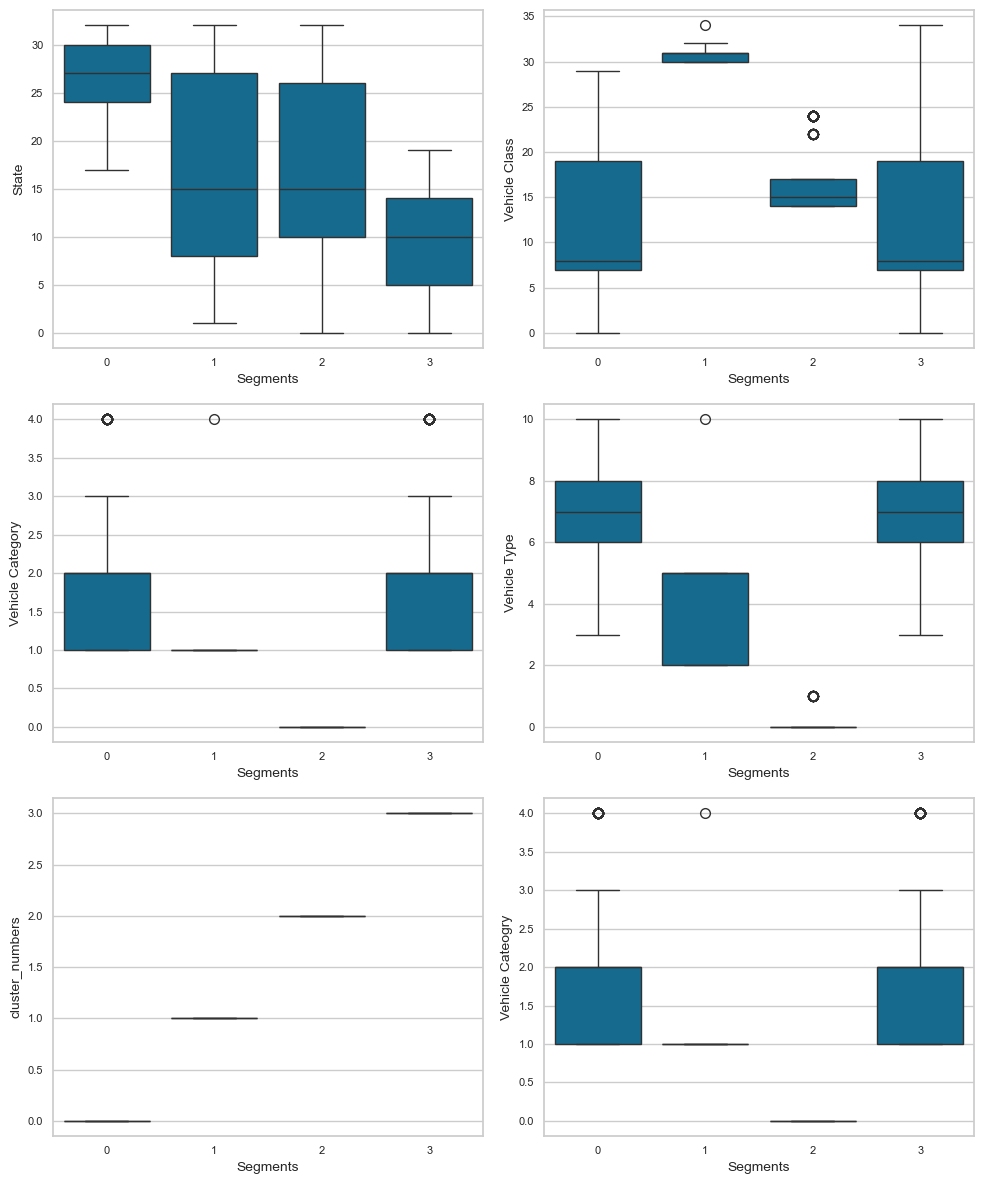

In [88]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(EV_india_seg1.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(EV_india_seg1, x = 'cluster_numbers', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.savefig("segments.png")
plt.show()